In [1]:
from AIChatRenpy import AIChat
chat = AIChat(preprompt_key="evaluation")

In [51]:
import json
from PIL import Image, ImageDraw, ImageFont, ImageColor, ImageFilter


In [5]:
reponse = chat.talk("""
Verso : La verite fondamentale de l'existence est la souffrance
Recto : Regarde le soleil est beau
""")
reponse = reponse.replace("```","").replace("json","")
# transform string to dic
dic = json.loads(reponse)
print(dic)

{'topic': 'beauté vs souffrance', 'emotion': 'persuasion douce', 'impact_message': 70, 'raisonnement_note': "Recto tente de réfuter le déterminisme de Verso par une observation du monde extérieur, apportant une perspective alternative basée sur l'esthétique, ce qui est cohérent avec sa posture."}


In [8]:
js = """
{"topic": "La résignation du dénouement", "emotion": "Acceptation", "impact_message": "6"}
"""


In [9]:
json = json.loads(js)

In [2]:
def convert_roman(chiffre):
    romain = {1: 'I',
        2: 'II',
        3: 'III',
        4: 'IV',
        5: 'V',
        6: 'VI',
        7: 'VII',
        8: 'VIII',
        9: 'IX',
        10: 'X'}
    return romain[chiffre]

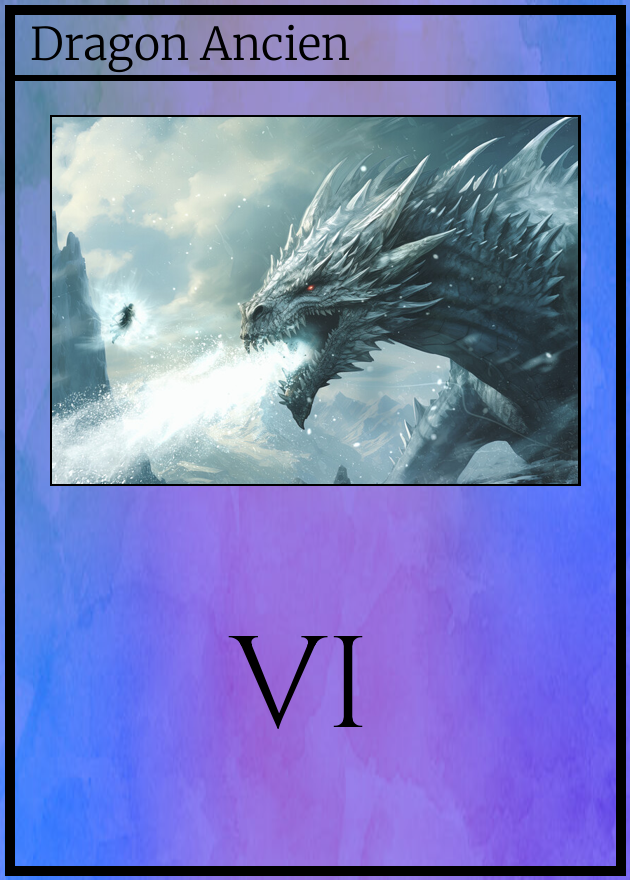

In [ ]:

width, height = 630, 880
background = Image.open("rainbow.jpg").convert("RGB").resize((width, height))
tint_color = ImageColor.getrgb("blue")
color_layer = Image.new("RGB", (width, height), tint_color)
card = Image.blend(background, color_layer, alpha=0.4)

# Dessine un contour
draw = ImageDraw.Draw(card)
border_color = (0, 0, 0)
border_thickness = 10
draw.rectangle(
    [border_thickness/2, border_thickness/2, width-border_thickness/2, height-border_thickness/2],
    outline=border_color,
    width=border_thickness
)

# nom de la carte
card_name = "Dragon Ancien"
font_size = 45

try:
    font = ImageFont.truetype("fonts/merriweather.ttf", font_size)
except:
    font = ImageFont.load_default()  # fallback

bbox = draw.textbbox((0, 0), card_name)
text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]

x = 30
y = 15  # marge du haut

draw.text((x, y), card_name, fill=(0, 0, 0), font=font)

# --- Delimiter / banner under title ---
banner_height = text_h + 20  # some padding
banner_y_start = y + text_h + 10
draw.rectangle(
    [10, banner_y_start+40, width-10, banner_y_start + 45],  # thin line
    fill=(0, 0, 0)
)

# --- Image placeholder ---
image_y_start = banner_y_start + 50
image_height = 400
draw.rectangle(
    [50, image_y_start+30, width-50, image_y_start + image_height],
    outline=(0, 0, 0),
    width=3
)

try:
    font = ImageFont.truetype("fonts/cinzel.ttf", 130)
except:
    font = ImageFont.load_default()  # fallback

draw.text((230, 600), convert_roman(6), fill=(0, 0, 0), font=font)
art = Image.open("234002.jpg")  # path to your art image

# Resize it to fit the placeholder
art = art.resize((width-104, 367))  # same size as placeholder rectangle

# Paste it onto the card
card.paste(art, (52, image_y_start+32))
card.save("carte_nom.png")
card

In [143]:
def create_tcg_card(
    card_name: str,
    art_path: str,
    background_path: str = "rainbow.jpg",
    output_path: str = "carte_nom.png",
    tint_color: str = "blue",
    power: int = 10,
    size: tuple = (630, 880),
    border_ratio: float = 0.015,  # ratio instead of px
    font_dir: str = "fonts"
):
    """Crée une carte TCG stylisée avec fond, teinte, image et textes.
    Tous les éléments sont redimensionnés proportionnellement à la taille de la carte.
    """

    width, height = size

    # --- ÉCHELLES (ratios adaptatifs) ---
    border_thickness = int(min(width, height) * border_ratio)
    margin = int(width * 0.05)
    font_size = int(height * 0.06)
    small_gap = int(height * 0.015)
    banner_height = int(height * 0.005)
    image_top_offset = int(height * 0.05)
    image_height = int(height * 0.45)

    # --- FOND + TEINTE ---
    background = Image.open(background_path).convert("RGB").resize((width, height))
    tint_rgb = ImageColor.getrgb(tint_color)
    color_layer = Image.new("RGB", (width, height), tint_rgb)
    card = Image.blend(background, color_layer, alpha=0.4)

    draw = ImageDraw.Draw(card)

    # --- CONTOUR ---
    # Gold frame
    gold =  (30, 30, 30) 
    shadow =  (270, 270, 270)
    draw.rectangle([0, 0, width, height], outline=shadow, width=border_thickness*2)
    draw.rectangle(
        [border_thickness, border_thickness, width-border_thickness, height-border_thickness],
        outline=gold,
        width=border_thickness
    )

    # --- TITRE ---
    try:
        font = ImageFont.truetype("fonts/merriweather.ttf", font_size)
    except:
        font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), card_name, font=font)
    text_w, text_h = bbox[2] - bbox[0], bbox[3] - bbox[1]

    x = margin
    y = margin
    draw.text((x, y), card_name, fill=(0, 0, 0), font=font)

    # --- BANNIÈRE / DÉLIMITEUR ---
    banner_y_start = y + text_h + small_gap
    draw.rectangle(
        [margin / 2, banner_y_start, width - margin / 2, banner_y_start + banner_height],
        fill=gold
    )

    # --- IMAGE PRINCIPALE ---
    image_y_start = banner_y_start + image_top_offset
    left = margin
    right = width - margin
    bottom = image_y_start + image_height

    draw.rectangle([left, image_y_start, right, bottom], outline=(0, 0, 0), width=int(border_thickness * 0.3))

    art = Image.open(art_path).convert("RGB")
    art = art.resize((right - left - int(border_thickness * 0.6), image_height - int(border_thickness * 0.6)))
    card.paste(art, (left + int(border_thickness * 0.5), image_y_start + int(border_thickness * 0.5)))

    # --- PUISSANCE (chiffre romain) ---
    try:
        roman_font = ImageFont.truetype("fonts/cinzel.ttf", int(font_size * 2))
    except:
        roman_font = ImageFont.load_default()

    roman_x = int(width * 0.45)
    roman_y = int(height * 0.68)
    draw.text((roman_x, roman_y), convert_roman(power), fill=(0, 0, 0), font=roman_font)

    # --- EXPORT ---
    card.save(output_path)
    return card

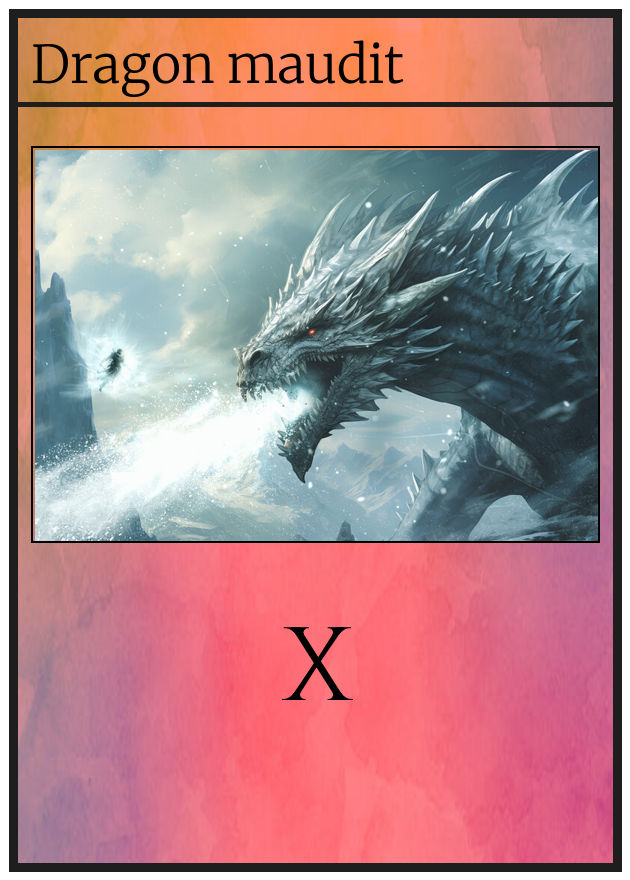

In [ ]:
create_tcg_card("Dragon maudit","234002.jpg", tint_color="red", size=())